# 纽斯K7 v3 wifi光谱二维码解析以及生成  
by LawSome  
主要参考：https://www.bilibili.com/video/BV1WW4y1a7rr/

In [1]:
import cv2
from pyzbar.pyzbar import decode
import pandas as pd
import os

# 光谱二维码解析，生成csv文件

读取二维码图片（JPG格式）

In [2]:
# 读取图片
image_path = './image.jpg'
image = cv2.imread(image_path)
absolute_path = os.path.abspath(image_path)
print("读取的二维码图片路径:", absolute_path) 

# 将图片转为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用pyzbar库解码二维码
barcodes = decode(gray)

# 遍历解码结果
for barcode in barcodes:
    # 提取二维码的数据
    rawData = barcode.data.decode('utf-8')

print(f"二维码原始数据: {rawData}")

读取的二维码图片路径: c:\Users\LawSome\Documents\GitHub\k7v3wifiSp\src\demo\image.jpg
二维码原始数据: 323232323232#00000000000000000100000000000000020000000000000003000000000000000400000000000000050000000000000006000000000000000700000000000000080000000000000009000514141414000a000a28282828050b001e5a5a465a140c001e5a5a465a140d001e5a5a465a140e001e5a5a465a140f001e5a5a465a1410001e5a5a465a1411001e5a5a465a1412001e5a5a465a1413000a28282828051400051414141400150000000000000016000000000000001700000000000000


从 二维码原始数据 提取出 每个时间点数据

In [46]:
code_name = rawData[0:13]
print(f'光谱编号：{code_name}')
lightData = rawData[13:]
# 初始化一个空数组
result_array = []

# 将每一组16位提取出来，放到数组中
for i in range(0, len(lightData), 16):
    group = lightData[i:i+16]
    result_array.append(group)

# 创建一个 pandas 数据框
df = pd.DataFrame({code_name: result_array})
print('16进制光谱数据:')
df

光谱编号：323232323232#
16进制光谱数据:


,323232323232#
0,0000000000000000
1,0100000000000000
2,0200000000000000
3,0300000000000000
4,0400000000000000
5,0500000000000000
6,0600000000000000
7,0700000000000000
8,0800000000000000
9,0900051414141400


In [47]:

# 定义一个函数，用于将16位数拆分成两位一组，并转换为10进制
def split_16_bits_and_convert(value):
    return [int(value[i:i+2], 16) for i in range(0, len(value), 2)]

# 在数据框中应用这个函数，得到一个包含8列的数据框
new_columns = pd.DataFrame(df[code_name].apply(split_16_bits_and_convert).tolist(), columns=[f'col{i+1}' for i in range(8)])

# 将新列连接到原始数据框
df = pd.concat([df, new_columns], axis=1)
df

,323232323232#,col1,col2,col3,col4,col5,col6,col7,col8
0,0000000000000000,0,0,0,0,0,0,0,0
1,0100000000000000,1,0,0,0,0,0,0,0
2,0200000000000000,2,0,0,0,0,0,0,0
3,0300000000000000,3,0,0,0,0,0,0,0
4,0400000000000000,4,0,0,0,0,0,0,0
5,0500000000000000,5,0,0,0,0,0,0,0
6,0600000000000000,6,0,0,0,0,0,0,0
7,0700000000000000,7,0,0,0,0,0,0,0
8,0800000000000000,8,0,0,0,0,0,0,0
9,0900051414141400,9,0,5,20,20,20,20,0


In [48]:
new_column_names = {'col1': '时', 'col2': '分', 'col3': '白', 'col4': '蓝',
                    'col5': '绿', 'col6': '紫', 'col7': '浅蓝', 'col8': '红'}

# 使用 rename 方法重命名列
df = df.rename(columns=new_column_names)

# 显示更新后的数据框
print('处理后的光谱数据:')
df

处理后的光谱数据:


,323232323232#,时,分,白,蓝,绿,紫,浅蓝,红
0,0000000000000000,0,0,0,0,0,0,0,0
1,0100000000000000,1,0,0,0,0,0,0,0
2,0200000000000000,2,0,0,0,0,0,0,0
3,0300000000000000,3,0,0,0,0,0,0,0
4,0400000000000000,4,0,0,0,0,0,0,0
5,0500000000000000,5,0,0,0,0,0,0,0
6,0600000000000000,6,0,0,0,0,0,0,0
7,0700000000000000,7,0,0,0,0,0,0,0
8,0800000000000000,8,0,0,0,0,0,0,0
9,0900051414141400,9,0,5,20,20,20,20,0


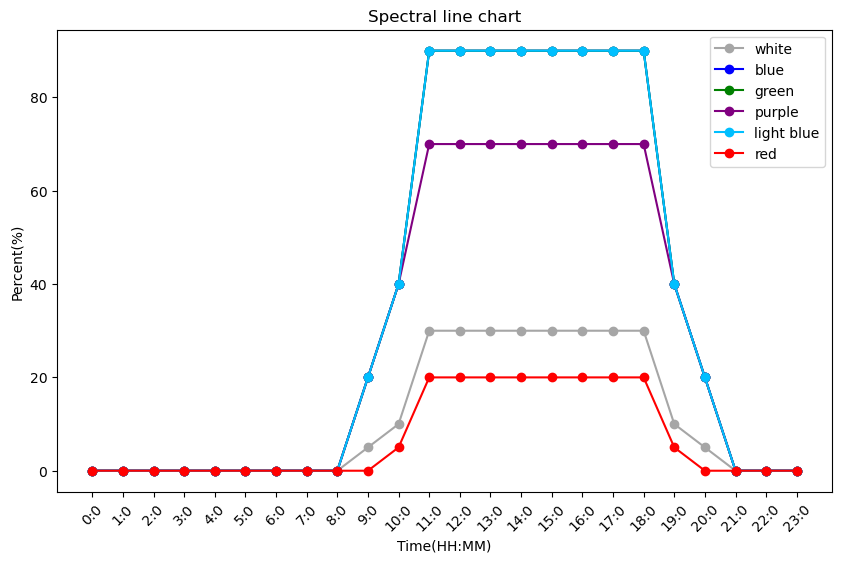

In [70]:
import matplotlib.pyplot as plt

df1 = df
df1['时间'] = df1['时'].astype(str) + ':' + df1['分'].astype(str) # 拼接'时'和'分'列，合并为'时间'列
df1 = df1.drop(df1.columns[[1, 2]], axis=1) # 删除'时'和'分'列
last_column = df1.pop(df1.columns[-1]) 
df1.insert(1, last_column.name, last_column) # 把'时间'列移动到第2列
new_column_names = {'时间': 'Time', '白': '#a6a6a6', '蓝': 'blue', '绿': 'green',
                    '紫': 'purple', '浅蓝': '#00BFFF', '红': 'red'}
# 使用 rename 方法重命名列
df1 = df1.rename(columns=new_column_names)

# 绘制图形
plt.figure(figsize=(10, 6))  # 设置图形大小
# 绘制图形
for column in df1.columns[2:]:
    if column == '#00BFFF':
        plt.plot(df1['Time'], df1[column], label='light blue', color = column, marker='o')
    elif column == '#a6a6a6':
        plt.plot(df1['Time'], df1[column], label='white', color = column, marker='o')
    else:
        plt.plot(df1['Time'], df1[column], label=column, color = column, marker='o')

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('Time(HH:MM)')
plt.ylabel('Percent(%)')
plt.title('Spectral line chart')
# 设置x轴标签倾斜
plt.xticks(rotation=45)
# 显示图形
plt.show()


保存为csv

In [6]:
# df保存为csv，ansi编码，便于excel打开显示中文字符
csv_file_path = './spectrum.csv'
absolute_path = os.path.abspath(csv_file_path)
df.to_csv(csv_file_path, index=False, encoding='ansi')
print("光谱表格保存路径:", absolute_path)

光谱表格保存路径: c:\Users\LawSome\Documents\GitHub\k7v3wifiSp\src\demo\spectrum.csv


# csv光谱转换为二维码

读取csv光谱文件

In [7]:
# 读取 CSV 文件
csv_file_path = "./spectrum.csv"  # 替换为你的 CSV 文件路径
absolute_path = os.path.abspath(csv_file_path)
df = pd.read_csv(csv_file_path, encoding='ansi')
print("读取的光谱表格路径:", absolute_path)

# 显示 DataFrame 的前几行
print("光谱数据:")
df

读取的光谱表格路径: c:\Users\LawSome\Documents\GitHub\k7v3wifiSp\src\demo\spectrum.csv
光谱数据:


,323232323232#,时,分,白,蓝,绿,紫,浅蓝,红
0,0000000000000000,0,0,0,0,0,0,0,0
1,0100000000000000,1,0,0,0,0,0,0,0
2,0200000000000000,2,0,0,0,0,0,0,0
3,0300000000000000,3,0,0,0,0,0,0,0
4,0400000000000000,4,0,0,0,0,0,0,0
5,0500000000000000,5,0,0,0,0,0,0,0
6,0600000000000000,6,0,0,0,0,0,0,0
7,0700000000000000,7,0,0,0,0,0,0,0
8,0800000000000000,8,0,0,0,0,0,0,0
9,0900051414141400,9,0,5,20,20,20,20,0


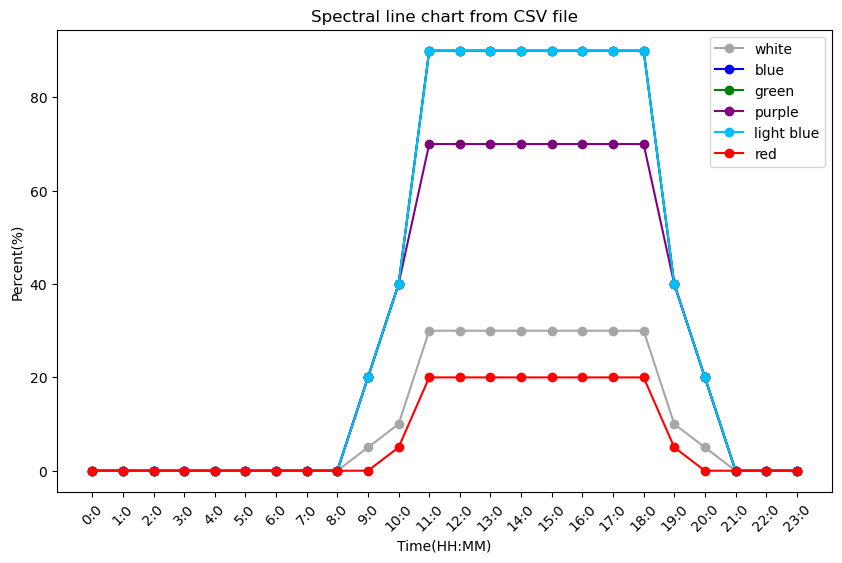

In [72]:
import matplotlib.pyplot as plt

df1 = df
df1['时间'] = df1['时'].astype(str) + ':' + df1['分'].astype(str) # 拼接'时'和'分'列，合并为'时间'列
df1 = df1.drop(df1.columns[[1, 2]], axis=1) # 删除'时'和'分'列
last_column = df1.pop(df1.columns[-1]) 
df1.insert(1, last_column.name, last_column) # 把'时间'列移动到第2列
new_column_names = {'时间': 'Time', '白': '#a6a6a6', '蓝': 'blue', '绿': 'green',
                    '紫': 'purple', '浅蓝': '#00BFFF', '红': 'red'}
# 使用 rename 方法重命名列
df1 = df1.rename(columns=new_column_names)

# 绘制图形
plt.figure(figsize=(10, 6))  # 设置图形大小
# 绘制图形
for column in df1.columns[2:]:
    if column == '#00BFFF':
        plt.plot(df1['Time'], df1[column], label='light blue', color = column, marker='o')
    elif column == '#a6a6a6':
        plt.plot(df1['Time'], df1[column], label='white', color = column, marker='o')
    else:
        plt.plot(df1['Time'], df1[column], label=column, color = column, marker='o')

# 添加图例
plt.legend()

# 添加标签和标题
plt.xlabel('Time(HH:MM)')
plt.ylabel('Percent(%)')
plt.title('Spectral line chart from CSV file')
# 设置x轴标签倾斜
plt.xticks(rotation=45)
# 显示图形
plt.show()

In [8]:
code_name = df.columns[0] # 记录光谱二维码开头数据
print(code_name)

323232323232#


提取后面8列

In [9]:
df1 = df.iloc[:, -8:]
df1

,时,分,白,蓝,绿,紫,浅蓝,红
0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0
9,9,0,5,20,20,20,20,0


In [10]:
# 将每一列的十进制数字转换为十六进制并进行零填充
df_hex = df1.apply(lambda x: x.apply(lambda y: format(y, 'x').zfill(2)))

# 将八列的十六进制数字拼接在一起
df_concatenated = df_hex.apply(lambda x: ''.join(x), axis=1)

# 显示结果
df_concatenated


0     0000000000000000
1     0100000000000000
2     0200000000000000
3     0300000000000000
4     0400000000000000
5     0500000000000000
6     0600000000000000
7     0700000000000000
8     0800000000000000
9     0900051414141400
10    0a000a2828282805
11    0b001e5a5a465a14
12    0c001e5a5a465a14
13    0d001e5a5a465a14
14    0e001e5a5a465a14
15    0f001e5a5a465a14
16    10001e5a5a465a14
17    11001e5a5a465a14
18    12001e5a5a465a14
19    13000a2828282805
20    1400051414141400
21    1500000000000000
22    1600000000000000
23    1700000000000000
dtype: object

In [11]:
# 选择要拼接的列（假设你要拼接第一列）
# column_to_concat = df_concatenated.iloc[:, 0]
# print(column_to_concat)
# 将列中的元素转换为字符串
column_as_strings = df_concatenated.astype(str)

# 使用字符串连接操作拼接所有字符串
result_string = ''.join(column_as_strings)
result_string = code_name + result_string
# 打印结果
print(result_string)

323232323232#00000000000000000100000000000000020000000000000003000000000000000400000000000000050000000000000006000000000000000700000000000000080000000000000009000514141414000a000a28282828050b001e5a5a465a140c001e5a5a465a140d001e5a5a465a140e001e5a5a465a140f001e5a5a465a1410001e5a5a465a1411001e5a5a465a1412001e5a5a465a1413000a28282828051400051414141400150000000000000016000000000000001700000000000000


生成二维码

In [12]:
import qrcode

# 创建QRCode对象
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

# 添加数据到QRCode对象
qr.add_data(result_string)
qr.make(fit=True)

# 创建PIL图像对象
img = qr.make_image(fill_color="black", back_color="white")

qrcode_file_path = "./qrcode.jpg"
absolute_path = os.path.abspath(qrcode_file_path)
# 保存图像文件
img.save(qrcode_file_path)

print("二维码已生成并保存到:")
print(absolute_path)

二维码已生成并保存到:
c:\Users\LawSome\Documents\GitHub\k7v3wifiSp\src\demo\qrcode.jpg
